<a href="https://colab.research.google.com/github/Apoorv0001/Covid19-Analyzer/blob/main/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [110]:
import os
from requests import request
import urllib.request
import json
from pandas.io.json import json_normalize

import numpy as np
import pandas as pd
import pandas_profiling
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import matplotlib.pyplot as plt
import folium 
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# color pallette
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 

# hide warnings
import warnings
warnings.filterwarnings('ignore')

from IPython.display import Markdown

%matplotlib inline

In [111]:
register_matplotlib_converters()

In [112]:
def bold(string):
    display(Markdown(string))

## Functions to Read Data from [Covid19India API](https://api.covid19india.org)

In [113]:
def read_from_api(URL, x=None):
    """
    Read data from API and Return Normalized JSON
    
    Keyword arguments:
    URL -- String API URL
    x -- String name to normalize API request into JSON
    """
    response = request(url=URL, method='get')
    elevations = response.json()
    return json_normalize(elevations) if x==None else json_normalize(elevations[x])

## functions for different plots

In [114]:

''' Function to plot countplot between to columns with bins valaues [0,20,30,40,50,60,70,80,90,100] '''

def countplot(columnname1,columnname2,plotTitle):
    bins = [0,20,30,40,50,60,70,80,90,100]
    plt.figure(figsize = (14,8))
    sns.countplot(x=pd.cut(columnname1,bins), hue = columnname2 , orient = 'h')
    plt.xlabel(columnname1.name)
    plt.yscale('log')
    plt.title(plotTitle)
    plt.grid(True)
    plt.show()
    return

In [115]:
''' Function to plot boxplot between two columns '''

def boxplot(dfname,columnname1,columnname2,plotTitle):
  plt.figure(figsize=(12, 6), dpi = 100)
  sns.boxplot(x = columnname1, y = columnname2, data = dfname, palette = 'viridis')
  plt.title(plotTitle)
  plt.xlabel(columnname1)
  plt.xticks(rotation=90) 
  plt.ylabel(columnname2)
  plt.tight_layout()
  plt.show()
  return

In [116]:
''' Function to plot pieChart '''
  
def pieChart(dfname,columnname, plotTitle):
    fig = px.pie(dfname, values=columnname, names=dfname.index
             ,color_discrete_sequence=px.colors.sequential.Plasma_r,title=plotTitle)
    fig.update_traces(textposition='outside', textinfo='value+label')
    fig.show()
    return

In [117]:
''' Function to plot bar chart'''

def barChart(dfname , columnname1 , columnname2, plotTitle ,barOrientation):
  fig = px.bar(dfname, x=columnname1, y=columnname2, orientation=barOrientation, text=columnname1, width=600,
       color_discrete_sequence = ['#35495e'], title=plotTitle)
  fig.update_xaxes(title=columnname1)
  fig.update_yaxes(title=columnname2)
  fig.show()
  return

In [118]:
''' Function to plot Histogram Distribution'''

def histogramChart(dfname , columnname , plotTitle):
    fig = px.histogram(dfname, x=columnname, color_discrete_sequence = ['#35495e'], nbins=50,title=plotTitle)
    fig.show()
    return


In [119]:
''' Function to plot Tree Map'''

def treeMapCart(dfname , columnList , valueColumn , plotTitle):
  fig = px.treemap(dfname, path=columnList, values=valueColumn, height=700,
           title=plotTitle, color_discrete_sequence = px.colors.qualitative.Prism)
  fig.data[0].textinfo = 'label+text+value'
  fig.show()
  return

In [120]:

df_raw_data = read_from_api('https://api.covid19india.org/raw_data.json', 'raw_data')
df_death_and_recoveries = read_from_api('https://api.covid19india.org/deaths_recoveries.json','deaths_recoveries')
df_cases_time_series = read_from_api('https://api.covid19india.org/data.json','cases_time_series')
df_statewise = read_from_api('https://api.covid19india.org/data.json','statewise')
df_tested = read_from_api('https://api.covid19india.org/data.json','tested')
df_district_wise = read_from_api(URL='https://api.covid19india.org/v2/state_district_wise.json')
df_states_daily = read_from_api('https://api.covid19india.org/states_daily.json','states_daily')
df_resources = read_from_api('https://api.covid19india.org/resources/resources.json','resources')

In [121]:
bold('**COVID19 - RAW DATA**')
df_raw_data.head()

**COVID19 - RAW DATA**

,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,estimatedonsetdate,gender,nationality,notes,numcases,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
0,20,Student from Wuhan,,Recovered,30/01/2020,Thrissur,Thrissur,Kerala,,F,India,Travelled from Wuhan,1,1,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-TS-P1,14/02/2020,Imported
1,,Student from Wuhan,,Recovered,02/02/2020,Alappuzha,Alappuzha,Kerala,,,India,Travelled from Wuhan,1,2,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-AL-P1,14/02/2020,Imported
2,,Student from Wuhan,,Recovered,03/02/2020,Kasaragod,Kasaragod,Kerala,,,India,Travelled from Wuhan,1,3,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,KL,KL-KS-P1,14/02/2020,Imported
3,45,Travel history to Italy and Austria,,Recovered,02/03/2020,East Delhi (Mayur Vihar),East Delhi,Delhi,,M,India,"Travelled from Austria, Italy",1,4,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,,DL,DL-P1,15/03/2020,Imported
4,24,"Travel history to Dubai, Singapore contact",,Recovered,02/03/2020,Hyderabad,Hyderabad,Telangana,,M,India,"Travelled from Dubai to Bangalore on 20th Feb,...",1,5,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,TG,TS-P1,02/03/2020,Imported


In [122]:
bold('**COVID19 - DEATH AND RECOVERY DATA**')
df_death_and_recoveries.head()

**COVID19 - DEATH AND RECOVERY DATA**

,agebracket,city,date,district,gender,nationality,notes,patientnumbercouldbemappedlater,patientstatus,slno,source1,source2,source3,state,statecode
0,,,13/03/2020,,,,KA-P6,P74,Deceased,59,Opening Data as of Mar 29,,,Karnataka,KA
1,,,20/03/2020,,,,KA-P5,,Recovered,54,Opening Data as of Mar 29,,,Karnataka,KA
2,,,24/03/2020,,,,KA-P2,,Recovered,55,Opening Data as of Mar 29,,,Karnataka,KA
3,,,24/03/2020,,,,KA-P4,,Recovered,56,Opening Data as of Mar 29,,,Karnataka,KA
4,,,26/03/2020,,,,KA-P53,P690,Deceased,60,Opening Data as of Mar 29,,,Karnataka,KA


In [123]:
bold('**COVID19 - CASES TIME SERIES DATA**')
df_cases_time_series.tail()

**COVID19 - CASES TIME SERIES DATA**

,dailyconfirmed,dailydeceased,dailyrecovered,date,dateymd,totalconfirmed,totaldeceased,totalrecovered
441,216828,1184,117897,15 April 2021,2021-04-15,14287843,173746,12543886
442,234002,1338,122886,16 April 2021,2021-04-16,14521845,175084,12666772
443,260895,1498,138209,17 April 2021,2021-04-17,14782740,176582,12804981
444,275063,1620,143839,18 April 2021,2021-04-18,15057803,178202,12948820
445,257003,1757,154357,19 April 2021,2021-04-19,15314806,179959,13103177


In [124]:
bold('**COVID19 - STATEWISE DATA**')
df_statewise.head()

**COVID19 - STATEWISE DATA**

,active,confirmed,deaths,deltaconfirmed,deltadeaths,deltarecovered,lastupdatedtime,migratedother,recovered,state,statecode,statenotes
0,2024681,15314889,180550,0,0,0,20/4/2021 10:21:57,6315,13103343,Total,TT,
1,676520,3898262,60824,0,0,0,19/04/2021 20:11:58,1678,3159240,Maharashtra,MH,"[Dec 16]:10,218 duplicate cases & other state ..."
2,103001,1253069,4951,0,0,0,19/04/2021 19:02:13,326,1144791,Kerala,KL,Mahe native who expired in Kannur included in ...
3,142084,1176850,13497,0,0,0,19/04/2021 20:12:00,19,1021250,Karnataka,KA,
4,48053,968000,7437,0,0,0,19/04/2021 18:21:06,0,912510,Andhra Pradesh,AP,


In [125]:
bold('**COVID19 - TESTS DATA**')
df_tested.head()

**COVID19 - TESTS DATA**

,aefi,dailyrtpcrsamplescollectedicmrapplication,firstdoseadministered,frontlineworkersvaccinated1stdose,frontlineworkersvaccinated2nddose,healthcareworkersvaccinated1stdose,healthcareworkersvaccinated2nddose,over45years1stdose,over45years2nddose,over60years1stdose,over60years2nddose,positivecasesfromsamplesreported,registrationflwhcw,registrationonline,registrationonspot,samplereportedtoday,seconddoseadministered,source,source2,source3,source4,testedasof,testsconductedbyprivatelabs,to60yearswithco-morbidities1stdose,to60yearswithco-morbidities2nddose,totaldosesadministered,totalindividualstested,totalindividualsvaccinated,totalpositivecases,totalrtpcrsamplescollectedicmrapplication,totalsamplestested,totalsessionsconducted,updatetimestamp
0,,,,,,,,,,,,,,,,,,Press_Release_ICMR_13March2020.pdf,,,,13/03/2020,,,,,5900,,78,,6500,,13/03/2020 00:00:00
1,,,,,,,,,,,,,,,,,,ICMR_website_update_18March_6PM_IST.pdf,,,,18/03/2020,,,,,12235,,150,,13125,,18/03/2020 18:00:00
2,,,,,,,,,,,,,,,,,,ICMR_website_update_19March_10AM_IST_V2.pdf,,,,19/03/2020,,,,,12426,,168,,13316,,19/03/2020 10:00:00
3,,,,,,,,,,,,,,,,,,ICMR_website_update_19March_6PM_IST.pdf,,,,19/03/2020,,,,,13285,,182,,14175,,19/03/2020 18:00:00
4,,,,,,,,,,,,,,,,,,ICMR_website_update_20March_10AM_IST.pdf,,,,20/03/2020,,,,,13486,,206,,14376,,20/03/2020 10:00:00


In [126]:
bold('**COVID19 - DISTRICTWISE DATA**')
df_district_wise.head()


**COVID19 - DISTRICTWISE DATA**

,state,statecode,districtData
0,State Unassigned,UN,"[{'district': 'Unassigned', 'notes': '', 'acti..."
1,Andaman and Nicobar Islands,AN,"[{'district': 'Nicobars', 'notes': 'District-w..."
2,Andhra Pradesh,AP,"[{'district': 'Foreign Evacuees', 'notes': '',..."
3,Arunachal Pradesh,AR,"[{'district': 'Anjaw', 'notes': '', 'active': ..."
4,Assam,AS,"[{'district': 'Airport Quarantine', 'notes': '..."


In [127]:
bold('**COVID19 - STATES DATA**')
df_states_daily.head()

**COVID19 - STATES DATA**

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0


In [128]:
bold('**COVID19 - ESSENTIALS AND RESOURCES DATA**')
df_resources.head()

**COVID19 - ESSENTIALS AND RESOURCES DATA**

,category,city,contact,descriptionandorserviceprovided,nameoftheorganisation,phonenumber,recordid,state
0,CoVID-19 Testing Lab,Port Blair,http://rmrc.res.in/,Government approved and supported Testing labs...,Regional Medical Research Centre (ICMR),"3192251158,\n3192251159",1,Andaman & Nicobar
1,CoVID-19 Testing Lab,Kakinada,https://web.archive.org/web/20190103062219/htt...,Government Approved and Supported Testing Lab ...,Rangaraya Medical College,8842363401,2,Andhra Pradesh
2,Free Food,Vijayawada,http://amruthahastam.org,We are providing free food service to the need...,Amrutha Hastam Charitable Trust,9246472100,3,Andhra Pradesh
3,CoVID-19 Testing Lab,Vijayawada,http://ssmctumkur.org/,Government Approved and Supported Testing Lab ...,Sidhartha Medical College,8662450390,4,Andhra Pradesh
4,Fundraisers,Visakhapatnam,http://www.irdwsi.in,Volunteers and Staff to engage in awareness bu...,The Integrated Rural Development of Weaker Sec...,9849120377,5,Andhra Pradesh


In [129]:
print("Data Shape : Rows = {} , Columns = {}".format(df_raw_data.shape[0],df_raw_data.shape[1]))

Data Shape : Rows = 28183 , Columns = 21


In [130]:
print("Column Names are : \n", df_raw_data.columns)

Column Names are : 
 Index(['agebracket', 'backupnotes', 'contractedfromwhichpatientsuspected',
       'currentstatus', 'dateannounced', 'detectedcity', 'detecteddistrict',
       'detectedstate', 'estimatedonsetdate', 'gender', 'nationality', 'notes',
       'numcases', 'patientnumber', 'source1', 'source2', 'source3',
       'statecode', 'statepatientnumber', 'statuschangedate',
       'typeoftransmission'],
      dtype='object')


In [131]:
data=df_raw_data.copy()

In [132]:
df_raw_data.describe()

,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,estimatedonsetdate,gender,nationality,notes,numcases,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
count,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183
unique,93,223,225,4,59,512,444,33,1,3,13,931,66,27892,1234,404,115,33,2985,56,6
top,,,,Hospitalized,25/04/2020,,,Maharashtra,,,,Details awaited,1,,https://twitter.com/THMumbai/status/1254064073...,,,MH,,25/04/2020,
freq,25837,27822,26545,27954,1883,25833,6985,8284,28183,22870,25474,23180,27948,292,811,24310,27731,8284,25186,1835,25193


In [133]:
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28183 entries, 0 to 28182
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   agebracket                           28183 non-null  object
 1   backupnotes                          28183 non-null  object
 2   contractedfromwhichpatientsuspected  28183 non-null  object
 3   currentstatus                        28183 non-null  object
 4   dateannounced                        28183 non-null  object
 5   detectedcity                         28183 non-null  object
 6   detecteddistrict                     28183 non-null  object
 7   detectedstate                        28183 non-null  object
 8   estimatedonsetdate                   28183 non-null  object
 9   gender                               28183 non-null  object
 10  nationality                          28183 non-null  object
 11  notes                                2818

In [134]:
df_raw_data['agebracket'] = df_raw_data['agebracket'].replace('28-35', 35)

In [135]:
df_raw_data['agebracket'] = pd.to_numeric(df_raw_data['agebracket'], errors='coerce')
df_raw_data['backupnotes'] = df_raw_data['backupnotes'].astype(str)
df_raw_data['contractedfromwhichpatientsuspected'] = df_raw_data['contractedfromwhichpatientsuspected'].astype(str)
df_raw_data['currentstatus'] = df_raw_data['currentstatus'].astype('category')
df_raw_data['dateannounced'] = pd.to_datetime(df_raw_data['dateannounced'])
df_raw_data['detectedcity'] = df_raw_data['detectedcity'].astype(str)
df_raw_data['detecteddistrict'] = df_raw_data['detecteddistrict'].astype(str)
df_raw_data['detectedstate'] = df_raw_data['detectedstate'].astype(str)
df_raw_data['gender']= df_raw_data['gender'].astype('category')
df_raw_data['nationality']=df_raw_data['nationality'].astype(str)
df_raw_data['notes']= df_raw_data['notes'].astype('category')
#df_raw_data['patientnumber'] = df_raw_data['patientnumber'].astype(int)
df_raw_data['source1']=df_raw_data['source1'].astype(str)
df_raw_data['source2']=df_raw_data['source2'].astype(str)
df_raw_data['source3']=df_raw_data['source3'].astype(str)
df_raw_data['statecode']=df_raw_data['statecode'].astype(str)
df_raw_data['statepatientnumber']=df_raw_data['statepatientnumber'].astype(str)
df_raw_data['statuschangedate']=pd.to_datetime(df_raw_data['statuschangedate'])
df_raw_data['typeoftransmission']=df_raw_data['typeoftransmission'].astype('category')

In [136]:
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28183 entries, 0 to 28182
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   agebracket                           2346 non-null   float64       
 1   backupnotes                          28183 non-null  object        
 2   contractedfromwhichpatientsuspected  28183 non-null  object        
 3   currentstatus                        28183 non-null  category      
 4   dateannounced                        28183 non-null  datetime64[ns]
 5   detectedcity                         28183 non-null  object        
 6   detecteddistrict                     28183 non-null  object        
 7   detectedstate                        28183 non-null  object        
 8   estimatedonsetdate                   28183 non-null  object        
 9   gender                               28183 non-null  category      
 10  nationalit

In [137]:
#df_raw_data.drop(['estimatedonsetdate', 'notes', 'contractedfromwhichpatientsuspected', 'source1', 'source2', 'source3', 'backupnotes' ], axis = 1, inplace = True)
df_raw_data.drop(['estimatedonsetdate'], axis = 1, inplace = True)
df_raw_data.sample(10)

,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,gender,nationality,notes,numcases,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
8845,NaN,,,Hospitalized,2020-12-04,,Ranipet,Tamil Nadu,,,Details awaited,1,8846,https://twitter.com/ANI/status/124931529760707...,https://twitter.com/THChennai/status/124931342...,,TN,TN-P1029,2020-12-04,
3903,NaN,,E0,Hospitalized,2020-05-04,,Vellore,Tamil Nadu,M,,Travelled to Delhi,1,3904,State Bulletin: 05 Apr Evening,,,TN,TN-P553,2020-05-04,Local
20844,NaN,,,Hospitalized,2020-04-22,,Pune,Maharashtra,,,Details awaited,1,20787,https://twitter.com/ANI/status/125296116695278...,,,MH,,2020-04-22,
22565,NaN,,,Hospitalized,2020-04-23,,,Maharashtra,,,Details awaited,1,22508,https://twitter.com/ANI/status/125334219922530...,,,MH,,2020-04-23,
23176,NaN,,,Hospitalized,2020-04-24,,Kota,Rajasthan,,,Details awaited,1,23119,https://t.me/indiacovid/3058,,,RJ,,2020-04-24,
3381,NaN,,E0,Hospitalized,2020-04-04,,Chennai,Tamil Nadu,M,,Travelled to Delhi,1,3382,https://twitter.com/ANI/status/124641832005770...,,,TN,TN-P414,2020-04-04,Local
21035,NaN,,,Hospitalized,2020-04-22,,Hyderabad,Telangana,,,Details awaited,1,20978,https://twitter.com/ANI/status/125296932465199...,,,TG,,2020-04-22,
16199,NaN,,,Hospitalized,2020-04-19,,Chennai,Tamil Nadu,,,Details awaited,1,16199,https://stopcorona.tn.gov.in/wp-content/upload...,,,TN,TN-P1424,2020-04-19,
17616,NaN,,,Hospitalized,2020-04-20,,Mumbai,Maharashtra,,,Details awaited,1,17559,https://twitter.com/rajeshtope11/status/125213...,,,MH,,2020-04-20,
17510,NaN,,,Hospitalized,2020-04-20,,Ahmedabad,Gujarat,M,India,Details awaited,1,17453,https://twitter.com/ANI/status/125210896265004...,,,GJ,,2020-04-20,


## Age range distribution with Covid-19

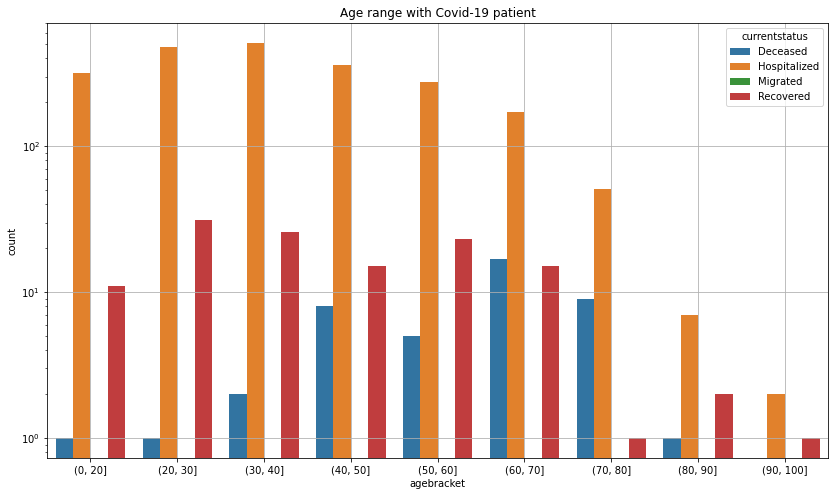

In [138]:
countplot(df_raw_data["agebracket"],df_raw_data["currentstatus"],"Age range with Covid-19 patient")

## COVID-19 - Age Range distribution across Nationality

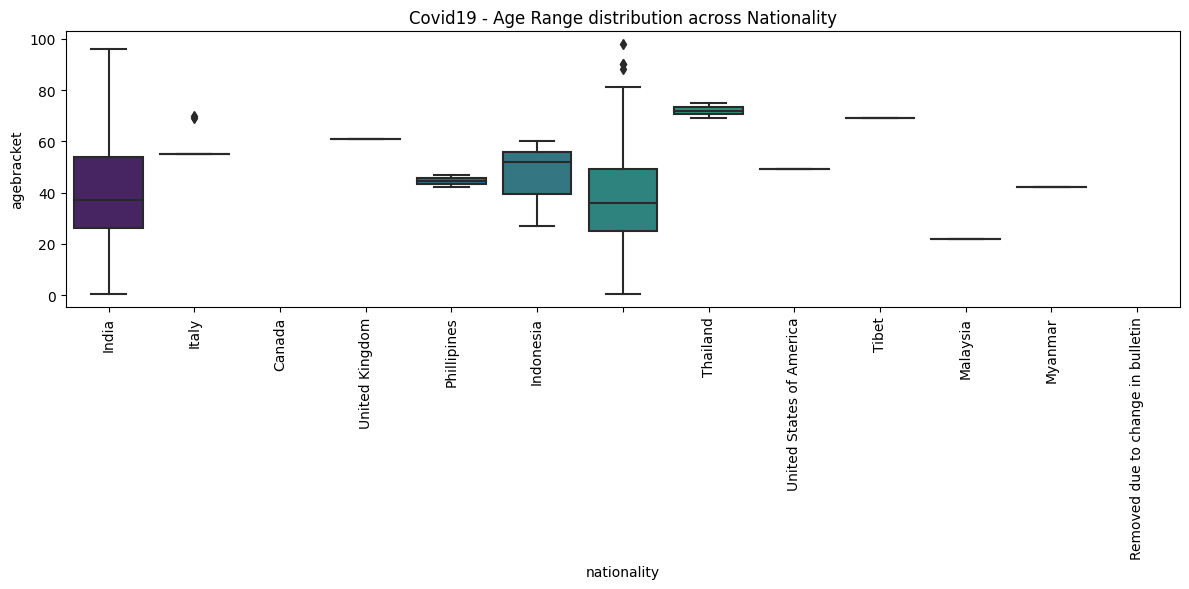

In [139]:

boxplot(df_raw_data,"nationality","agebracket","Covid19 - Age Range distribution across Nationality")

## Covid-19 Cases Distribution across States

In [140]:
state = df_raw_data.groupby('detectedstate').count()
pieChart(state , 'currentstatus' ,'Covid19 cases based on State')

## Covid-19 cases distribution based on Nationality

In [141]:
nationality = df_raw_data.groupby('nationality').count()
pieChart(nationality, 'currentstatus', 'Covid19 cases based on Nationality in India')

## No. of foreign citizens affected by Covid-19 in India

In [142]:

temp = df_raw_data.groupby('nationality')['patientnumber'].count().reset_index()
temp = temp.sort_values('patientnumber')
temp = temp[temp['nationality']!='']
temp = temp[temp['nationality']!='India']

barChart(temp , 'patientnumber' , 'nationality' , 'No. of foreign citizens' ,'h' )

## Covid-19 distribution based on Type of Transmission

In [143]:
temp = pd.DataFrame(df_raw_data[['typeoftransmission']].groupby('typeoftransmission')['typeoftransmission'].count())
temp = temp.dropna()
temp.columns = ['count']
temp = temp.reset_index().sort_values(by='count')

barChart(temp , 'count' , 'typeoftransmission' , 'Type of transmission','h' )

## Covid-19 cases Vs Age Brackets along with current status

In [144]:
fig = plotly.subplots.make_subplots(
    rows=1, cols=2, column_widths=[0.8, 0.2],
    subplot_titles = ['Cases vs Age', ''],
    specs=[[{"type": "histogram"}, {"type": "pie"}]]
)

temp = df_raw_data[['agebracket', 'currentstatus']].dropna()
print('Total no. of values :', df_raw_data.shape[0], '\nNo. of missing values :', df_raw_data.shape[0]-temp.shape[0], '\nNo. of available values :', df_raw_data.shape[0]-(df_raw_data.shape[0]-temp.shape[0]))
gen_grp = temp.groupby('currentstatus').count()

fig.add_trace(go.Pie(values=gen_grp.values.reshape(-1).tolist(), labels=['Deceased', 'Hospitalized', 'Recovered'], 
                     marker_colors = ['#fd0054', '#393e46', '#40a798'], hole=.3),1, 2)

fig.add_trace(go.Histogram(x=temp[temp['currentstatus']=='Deceased']['agebracket'], nbinsx=50, name='Deceased', marker_color='#fd0054'), 1, 1)
fig.add_trace(go.Histogram(x=temp[temp['currentstatus']=='Recovered']['agebracket'], nbinsx=50, name='Recovered', marker_color='#40a798'), 1, 1)
fig.add_trace(go.Histogram(x=temp[temp['currentstatus']=='Hospitalized']['agebracket'], nbinsx=50, name='Hospitalized', marker_color='#393e46'), 1, 1)

fig.update_layout(showlegend=False)
fig.update_layout(barmode='stack')
fig.data[0].textinfo = 'label+text+value+percent'

fig.show()

Total no. of values : 28183 
No. of missing values : 25837 
No. of available values : 2346


## Covid-19 cases Gender Vs Age Brackets along with gender distribution

In [145]:
fig = plotly.subplots.make_subplots(
    rows=1, cols=2, column_widths=[0.8, 0.2],
    subplot_titles = ['Gender vs Age', ''],
    specs=[[{"type": "histogram"}, {"type": "pie"}]]
)

temp = df_raw_data[['agebracket', 'gender']].dropna()
print('Total no. of values :', df_raw_data.shape[0], '\nNo. of missing values :', df_raw_data.shape[0]-temp.shape[0], '\nNo. of available values :', df_raw_data.shape[0]-(df_raw_data.shape[0]-temp.shape[0]))
gen_grp = temp.groupby('gender').count()

fig.add_trace(go.Histogram(x=temp[temp['gender']=='F']['agebracket'], nbinsx=50, name='Female', marker_color='#6a0572'), 1, 1)
fig.add_trace(go.Histogram(x=temp[temp['gender']=='M']['agebracket'], nbinsx=50, name='Male', marker_color='#39065a'), 1, 1)

fig.add_trace(go.Pie(values=gen_grp.values.reshape(-1).tolist(), labels=['Female', 'Male'], marker_colors = ['#6a0572', '#39065a']),1, 2)

fig.update_layout(showlegend=False)
fig.update_layout(barmode='stack')
fig.data[2].textinfo = 'label+text+value+percent'

fig.show()


Total no. of values : 28183 
No. of missing values : 25837 
No. of available values : 2346


## Covid-19 cases Age distribution of confirmed patients

<Figure size 1200x600 with 0 Axes>

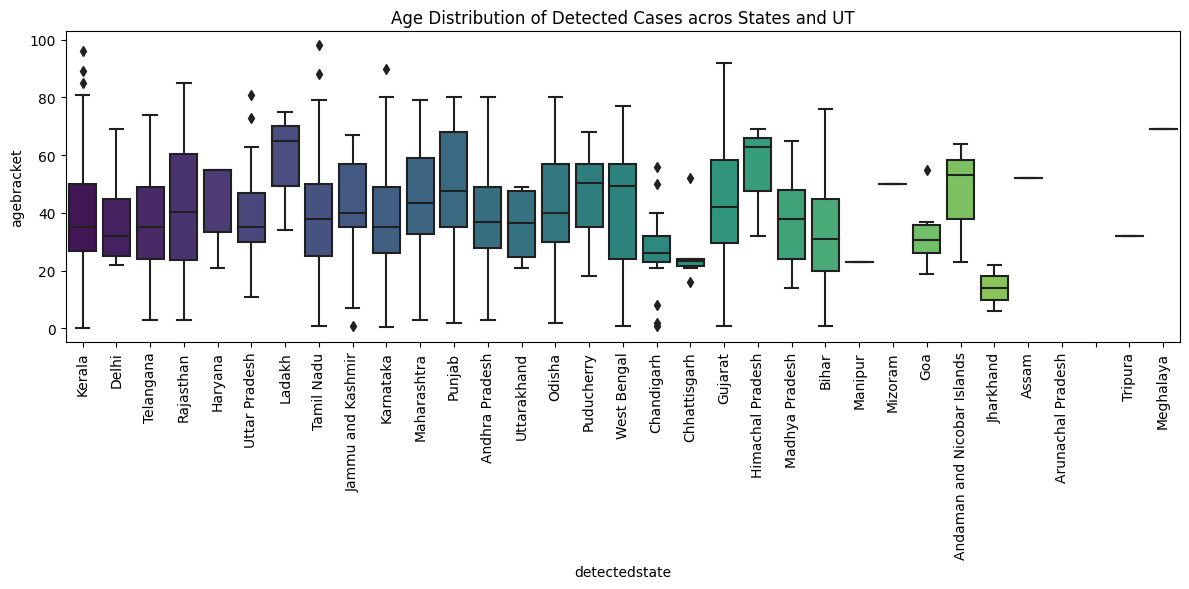

In [146]:
plt.figure(figsize=(12, 6), dpi = 100)
boxplot(df_raw_data,'detectedstate' , 'agebracket' ,'Age Distribution of Detected Cases acros States and UT')

### Age Distribution of COVID-19 Recovered Patients


In [147]:
dist = df_raw_data.groupby(['agebracket','currentstatus'])['patientnumber'].count().reset_index()
dist = dist[dist['currentstatus']=='Recovered']
dist
fig = px.bar(dist, x='agebracket', y='patientnumber', orientation='v', text='patientnumber', width=1200,
       color_discrete_sequence = ['#00CC96'], title='Age distribution of Recovered COVID Patient')

fig.update_xaxes(title='Age')
fig.update_yaxes(title='# Patient')
fig.show()


### Gender Distribution of COVID-19 Recovered Patients

In [148]:
dist = df_raw_data.groupby(['gender','currentstatus'])['patientnumber'].count().reset_index()
dist = dist[dist['currentstatus']=='Recovered']
dist
fig = px.pie(dist, values=dist['patientnumber'], names=dist.gender
         ,color_discrete_sequence=["#636EFA"],title='Gender distribution of COVID19 Recovered Patients')
fig.update_traces(textposition='outside', textinfo='value+label')
fig.show()

In [149]:
detected_city = df_raw_data['detectedcity'].value_counts().reset_index()
detected_city.rename(columns={"index":"cities",
                            "detectedcity": "Counts"}, inplace=True)

detected_city.cities.replace('', np.nan, inplace=True)
detected_city.dropna(subset=['cities'], how='all', inplace=True)
detected_city.head()

#barChart(detected_city, 'cities', 'Counts', 'Hotspot Cities Detected With Most cases', 'v')

fig = px.bar(detected_city.sort_values('Counts', ascending=True).sort_values('Counts', ascending=False).head(15), 
             y="Counts", x="cities", color= "cities",
             title='Hotspot Cities Detected With Most cases', 
             orientation='v',
             color_discrete_sequence = px.colors.cyclical.IceFire,
             width=700, height=600)
fig.update_traces(opacity=0.8)
fig.update_xaxes(title='Cities')
fig.update_yaxes(title='Counts')
fig.update_layout(template = 'plotly_white')
fig.show()

## Statewise Dataset Analysis 

In [150]:
df_statewise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   active           38 non-null     object
 1   confirmed        38 non-null     object
 2   deaths           38 non-null     object
 3   deltaconfirmed   38 non-null     object
 4   deltadeaths      38 non-null     object
 5   deltarecovered   38 non-null     object
 6   lastupdatedtime  38 non-null     object
 7   migratedother    38 non-null     object
 8   recovered        38 non-null     object
 9   state            38 non-null     object
 10  statecode        38 non-null     object
 11  statenotes       38 non-null     object
dtypes: object(12)
memory usage: 3.7+ KB


In [151]:
df_statewise.head()

,active,confirmed,deaths,deltaconfirmed,deltadeaths,deltarecovered,lastupdatedtime,migratedother,recovered,state,statecode,statenotes
0,2024681,15314889,180550,0,0,0,20/4/2021 10:21:57,6315,13103343,Total,TT,
1,676520,3898262,60824,0,0,0,19/04/2021 20:11:58,1678,3159240,Maharashtra,MH,"[Dec 16]:10,218 duplicate cases & other state ..."
2,103001,1253069,4951,0,0,0,19/04/2021 19:02:13,326,1144791,Kerala,KL,Mahe native who expired in Kannur included in ...
3,142084,1176850,13497,0,0,0,19/04/2021 20:12:00,19,1021250,Karnataka,KA,
4,48053,968000,7437,0,0,0,19/04/2021 18:21:06,0,912510,Andhra Pradesh,AP,


In [152]:
print("Data Shape : Rows = {} , Columns = {}".format(df_statewise.shape[0],df_statewise.shape[1]))

Data Shape : Rows = 38 , Columns = 12


In [153]:
print("Column Names are : \n", df_statewise.columns)

Column Names are : 
 Index(['active', 'confirmed', 'deaths', 'deltaconfirmed', 'deltadeaths',
       'deltarecovered', 'lastupdatedtime', 'migratedother', 'recovered',
       'state', 'statecode', 'statenotes'],
      dtype='object')


In [154]:
cols = ['active', 'confirmed', 'deaths', 'deltaconfirmed', 'deltadeaths',
       'deltarecovered', 'recovered']

In [155]:
df_statewise['lastupdatedtime'] = pd.to_datetime(df_statewise['lastupdatedtime'])
df_statewise[cols] = df_statewise[cols].astype(int)
df_statewise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   active           38 non-null     int64         
 1   confirmed        38 non-null     int64         
 2   deaths           38 non-null     int64         
 3   deltaconfirmed   38 non-null     int64         
 4   deltadeaths      38 non-null     int64         
 5   deltarecovered   38 non-null     int64         
 6   lastupdatedtime  38 non-null     datetime64[ns]
 7   migratedother    38 non-null     object        
 8   recovered        38 non-null     int64         
 9   state            38 non-null     object        
 10  statecode        38 non-null     object        
 11  statenotes       38 non-null     object        
dtypes: datetime64[ns](1), int64(7), object(4)
memory usage: 3.7+ KB


In [156]:
statewise_cases = df_statewise[['state','active','confirmed','deaths','recovered']]
statewise_cases = statewise_cases[statewise_cases.state !='Total']

In [157]:
statewise_cases['death_rate (per 100)'] = np.round(100*statewise_cases['deaths']/statewise_cases['confirmed'],2)

In [158]:
statewise_cases.head()

,state,active,confirmed,deaths,recovered,death_rate (per 100)
1,Maharashtra,676520,3898262,60824,3159240,1.56
2,Kerala,103001,1253069,4951,1144791,0.40
3,Karnataka,142084,1176850,13497,1021250,1.15
4,Andhra Pradesh,48053,968000,7437,912510,0.77
5,Tamil Nadu,75116,1002392,13157,914119,1.31


In [159]:
statewise_cases.dropna(subset=['death_rate (per 100)'], how='all', inplace=True)

In [160]:
print('Total Confirmed Cases: ',statewise_cases['confirmed'].sum())
print('Total Deaths: ',statewise_cases['deaths'].sum())
print('Total Recovered Cases: ',statewise_cases['recovered'].count())
print('Death Rate (per 100): ',np.round(100*statewise_cases['deaths'].sum()/statewise_cases['confirmed'].sum(),2))

Total Confirmed Cases:  15314889
Total Deaths:  180550
Total Recovered Cases:  36
Death Rate (per 100):  1.18


In [161]:
print('Total no. of values :', df_raw_data.shape[0], '\nNo. of missing values :', df_raw_data.shape[0]-df_raw_data[['agebracket']].dropna().shape[0],
      '\nNo. of available values :', df_raw_data.shape[0]-(df_raw_data.shape[0]-df_raw_data[['agebracket']].dropna().shape[0]))

histogramChart(df_raw_data,'agebracket','Distribution of ages of confirmed patients')

Total no. of values : 28183 
No. of missing values : 25837 
No. of available values : 2346


In [162]:
dist = df_raw_data.groupby(['detectedstate', 'detecteddistrict'])['patientnumber'].count().reset_index()
dist.head()

#treeMapCart(dist, ['detectedstate', 'detecteddistrict'] , 'patientnumber' , 'Number of Confirmed Cases')


,detectedstate,detecteddistrict,patientnumber
0,,,1
1,Andaman and Nicobar Islands,North and Middle Andaman,1
2,Andaman and Nicobar Islands,South Andaman,32
3,Andhra Pradesh,,3
4,Andhra Pradesh,Anantapur,53


In [163]:
#statewise_cases = df_statewise[['state','confirmed','active','recovered','deaths','death_rate (per 100)']]
bold("**STATE WISE CONFIRMED, DEATH AND RECOVERED CASES OF COVID-19**")
statewise_cases.sort_values('confirmed', ascending= False).style.background_gradient(cmap='YlOrBr',subset=["confirmed"])\
                        .background_gradient(cmap='Reds',subset=["deaths"])\
                        .background_gradient(cmap='Greens',subset=["recovered"])\
                        .background_gradient(cmap='Blues',subset=["active"])\
                        .background_gradient(cmap='Purples',subset=["death_rate (per 100)"])

**STATE WISE CONFIRMED, DEATH AND RECOVERED CASES OF COVID-19**

,state,active,confirmed,deaths,recovered,death_rate (per 100)
1,Maharashtra,676520,3898262,60824,3159240,1.560000
2,Kerala,103001,1253069,4951,1144791,0.400000
3,Karnataka,142084,1176850,13497,1021250,1.150000
5,Tamil Nadu,75116,1002392,13157,914119,1.310000
4,Andhra Pradesh,48053,968000,7437,912510,0.770000
7,Uttar Pradesh,208523,879831,9997,661311,1.140000
6,Delhi,76887,877146,12361,787898,1.410000
8,West Bengal,53418,668353,10606,604329,1.590000
11,Chhattisgarh,129000,558674,6083,423591,1.090000
10,Rajasthan,76641,426584,3204,346739,0.750000


In [164]:
barChart(statewise_cases , 'confirmed' , 'state' , 'Total Confirmed Cases' ,'h' )

In [165]:
barChart(statewise_cases , 'deaths' , 'state' , 'Total Confirmed Cases' ,'h' )

In [166]:
barChart(statewise_cases , 'recovered' , 'state' , 'Total Confirmed Cases' ,'h' )


In [167]:
barChart(statewise_cases , 'active' , 'state' , 'Total Confirmed Cases' ,'h' )


In [168]:
barChart(statewise_cases , 'death_rate (per 100)' , 'state' , 'Total Confirmed Cases' ,'h' )

# Death and Recovered Dataset

In [169]:
print("Column Names are : \n", df_death_and_recoveries.columns)

Column Names are : 
 Index(['agebracket', 'city', 'date', 'district', 'gender', 'nationality',
       'notes', 'patientnumbercouldbemappedlater', 'patientstatus', 'slno',
       'source1', 'source2', 'source3', 'state', 'statecode'],
      dtype='object')


In [170]:
df_death_and_recoveries.shape

(7407, 15)

In [171]:
df_death_and_recoveries.tail()

,agebracket,city,date,district,gender,nationality,notes,patientnumbercouldbemappedlater,patientstatus,slno,source1,source2,source3,state,statecode
7402,,,26/04/2020,,,,,,Recovered,7424,,,,Delhi,DL
7403,,,26/04/2020,,,,,,Recovered,7425,,,,Delhi,DL
7404,,,26/04/2020,,,,,,Recovered,7426,,,,Delhi,DL
7405,60,,26/04/2020,Kolkata,M,,First doctor to pass away in WB. He was Assist...,,Deceased,7427,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.ndtv.com/india-news/coronavirus-pa...,,West Bengal,WB
7406,34,,26/04/2020,Kolkata,M,,Admitted to hospital on Apr 23rd. Had breathin...,,Deceased,7428,https://www.wbhealth.gov.in/uploaded_files/cor...,https://timesofindia.indiatimes.com/city/kolka...,,West Bengal,WB


In [172]:
df_death_and_recoveries_data = df_death_and_recoveries[0:2247]

In [173]:
print("Data Shape : Rows = {} , Columns = {}".format(df_death_and_recoveries_data.shape[0],df_death_and_recoveries_data.shape[1]))


Data Shape : Rows = 2247 , Columns = 15


In [174]:
df_death_and_recoveries_data.tail()

,agebracket,city,date,district,gender,nationality,notes,patientnumbercouldbemappedlater,patientstatus,slno,source1,source2,source3,state,statecode
2242,69,,17/04/2020,Ahmedabad,M,,,,Deceased,2439,https://gujcovid19.gujarat.gov.in/uploads/pres...,,,Gujarat,GJ
2243,70,,17/04/2020,Ahmedabad,F,,,,Deceased,2440,https://gujcovid19.gujarat.gov.in/uploads/pres...,,,Gujarat,GJ
2244,69,,17/04/2020,Ahmedabad,M,,,,Deceased,2441,https://gujcovid19.gujarat.gov.in/uploads/pres...,,,Gujarat,GJ
2245,57,Meerut,17/04/2020,Meerut,M,,Came in contact with a Delhi returnee. Admitte...,,Deceased,2462,https://twitter.com/ANINewsUP/status/125116343...,https://www.hindustantimes.com/lucknow/second-...,,Uttar Pradesh,UP
2246,,,17/04/2020,,,,,,Deceased,2465,https://twitter.com/ANI/status/125117866782225...,,,Delhi,DL


In [175]:
df_death_and_recoveries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   agebracket                       2247 non-null   object
 1   city                             2247 non-null   object
 2   date                             2247 non-null   object
 3   district                         2247 non-null   object
 4   gender                           2247 non-null   object
 5   nationality                      2247 non-null   object
 6   notes                            2247 non-null   object
 7   patientnumbercouldbemappedlater  2247 non-null   object
 8   patientstatus                    2247 non-null   object
 9   slno                             2247 non-null   object
 10  source1                          2247 non-null   object
 11  source2                          2247 non-null   object
 12  source3                          2

**Observations**
1. agebracket should be numaric. 
2. date should be date time type.

**Observations**
1. agebracket has a high cardinality: 62 distinct values 
2. city has a high cardinality: 54 distinct values 
3. district has a high cardinality: 144 distinct values
4. notes has a high cardinality: 269 distinct values
5. patientnumbercouldbemappedlater has a high cardinality: 61 distinct values
6. source1 has a high cardinality: 332 distinct values 
7. source2 has a high cardinality: 87 distinct values

# Pre-Processing

In [176]:
df_death_and_recoveries_data['agebracket'] = pd.to_numeric(df_death_and_recoveries_data['agebracket'], errors='coerce')

In [177]:
df_death_and_recoveries_data['agebracket'] = df_death_and_recoveries_data['agebracket'].astype('float')

In [178]:
df_death_and_recoveries_data['date'] = pd.to_datetime(df_death_and_recoveries_data['date'])
df_death_and_recoveries_data['date'] = df_death_and_recoveries_data['date'].dt.strftime('%Y-%m-%d')

In [179]:
df_death_and_recoveries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   agebracket                       266 non-null    float64
 1   city                             2247 non-null   object 
 2   date                             2247 non-null   object 
 3   district                         2247 non-null   object 
 4   gender                           2247 non-null   object 
 5   nationality                      2247 non-null   object 
 6   notes                            2247 non-null   object 
 7   patientnumbercouldbemappedlater  2247 non-null   object 
 8   patientstatus                    2247 non-null   object 
 9   slno                             2247 non-null   object 
 10  source1                          2247 non-null   object 
 11  source2                          2247 non-null   object 
 12  source3             

In [180]:
df_death_and_recoveries_data.describe()

,agebracket
count,266.000000
mean,54.011278
std,17.240471
min,1.000000
25%,44.250000
50%,56.000000
75%,66.000000
max,95.000000


In [181]:
df_death_and_recoveries_data['agebracket'].isnull().sum()

1981

In [182]:
df_death_and_recoveries_data.drop(['slno','source1','source2','source3','patientnumbercouldbemappedlater'], axis = 1, inplace = True)

In [183]:
print("Column Names are : \n", df_death_and_recoveries_data.columns)

Column Names are : 
 Index(['agebracket', 'city', 'date', 'district', 'gender', 'nationality',
       'notes', 'patientstatus', 'state', 'statecode'],
      dtype='object')


In [184]:
print("Data Shape : Rows = {} , Columns = {}".format(df_death_and_recoveries_data.shape[0],df_death_and_recoveries_data.shape[1]))

Data Shape : Rows = 2247 , Columns = 10


# Post-Profiling

In [185]:
df_death_and_recoveries_data.head()

,agebracket,city,date,district,gender,nationality,notes,patientstatus,state,statecode
0,NaN,,2020-03-13,,,,KA-P6,Deceased,Karnataka,KA
1,NaN,,2020-03-20,,,,KA-P5,Recovered,Karnataka,KA
2,NaN,,2020-03-24,,,,KA-P2,Recovered,Karnataka,KA
3,NaN,,2020-03-24,,,,KA-P4,Recovered,Karnataka,KA
4,NaN,,2020-03-26,,,,KA-P53,Deceased,Karnataka,KA


## Exploratory Data Analysis 

### Age range distribution with recovered and death

In [186]:
for age in range(9,0,-1):
    df_death_and_recoveries_data.loc[df_death_and_recoveries_data['agebracket']<=age*10, 'Age_bin'] = age 
    print(age)

9
8
7
6
5
4
3
2
1


In [187]:
df_death_and_recoveries_data.groupby(['patientstatus','Age_bin'])['patientstatus'].count()

patientstatus          Age_bin
Deceased               1.0         1
                       2.0         2
                       3.0         3
                       4.0         8
                       5.0        31
                       6.0        54
                       7.0        54
                       8.0        31
                       9.0         4
NotCountedbyAnyState#  6.0         2
                       7.0         1
Recovered              1.0         2
                       2.0         4
                       3.0        19
                       4.0        18
                       5.0         9
                       6.0         7
                       7.0        11
                       8.0         3
Name: patientstatus, dtype: int64

In [188]:
df_death_and_recoveries_data['patientstatus'].value_counts()

Recovered                1767
Deceased                  477
NotCountedbyAnyState#       3
Name: patientstatus, dtype: int64

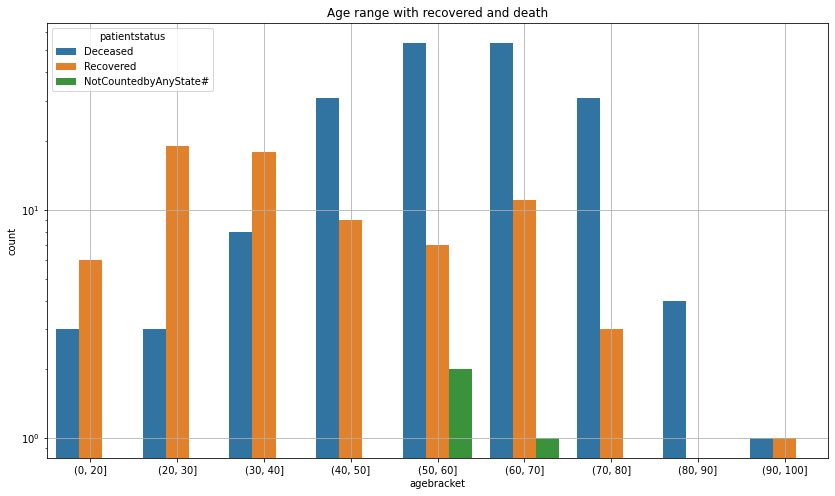

In [189]:
countplot(df_death_and_recoveries_data['agebracket'],df_death_and_recoveries_data['patientstatus'],'Age range with recovered and death')

## State vs Current Status

In [190]:
df_death_and_recoveries_data['district'].value_counts().sort_values(ascending = False).head(20)

                       1429
Mumbai                  122
Kasaragod                96
Pune                     50
Kannur                   36
Ahmedabad                35
Indore                   34
Gurugram                 17
Ernakulam                14
Italians                 14
Agra                     13
Bhavnagar                12
Surat                    12
Thrissur                 12
Malappuram               11
Meerut                   11
Hyderabad                11
Vadodara                 10
Kozhikode                10
Gautam Buddha Nagar      10
Name: district, dtype: int64

In [191]:
to_20_district = ['Mumbai','Kasaragod','Pune','Kannur','Ahmadabad','Indore','Gurugram','Italians','Ernakulam','Agra','Thrissur','Malappuram','Kozhikode','Hyderabad','Faridabad','Meerut','Gautam Buddha Nagar','Bengaluru','Bhavnagar']

In [192]:
df_death_and_recoveries_data[df_death_and_recoveries_data['district'].isin(to_20_district)].groupby(df_death_and_recoveries_data['district'])['patientstatus'].value_counts()

district             patientstatus
Agra                 Recovered          8
                     Deceased           5
Bhavnagar            Recovered          9
                     Deceased           3
Ernakulam            Recovered         14
Faridabad            Recovered         10
Gautam Buddha Nagar  Recovered         10
Gurugram             Recovered         17
Hyderabad            Deceased          10
                     Recovered          1
Indore               Deceased          34
Italians             Recovered         14
Kannur               Recovered         36
Kasaragod            Recovered         96
Kozhikode            Recovered         10
Malappuram           Recovered         11
Meerut               Recovered          9
                     Deceased           2
Mumbai               Deceased         108
                     Recovered         14
Pune                 Deceased          34
                     Recovered         16
Thrissur             Recovered         12

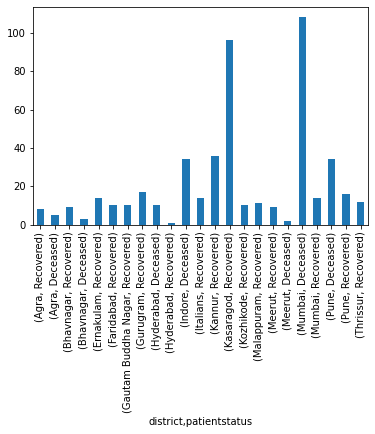

In [193]:
df_death_and_recoveries_data[df_death_and_recoveries_data['district'].isin(to_20_district)].groupby(df_death_and_recoveries_data['district'])['patientstatus'].value_counts().plot.bar( )

In [194]:
for i in df_death_and_recoveries_data['state'].unique():
    print ('-----------',i,'-----------')
    print (df_death_and_recoveries_data[df_death_and_recoveries_data['state']==i].groupby(df_death_and_recoveries_data['district'])['patientstatus'].value_counts())

----------- Karnataka -----------
district         patientstatus
                 Recovered        73
                 Deceased          3
Bagalkote        Deceased          1
Belagavi         Deceased          1
Bengaluru Urban  Recovered         6
                 Deceased          3
Chikkaballapura  Deceased          1
Chitradurga      Recovered         1
Davanagere       Recovered         1
Gadag            Deceased          1
Kalaburagi       Deceased          2
Uttara Kannada   Recovered         1
Vijayapura       Deceased          1
Name: patientstatus, dtype: int64
----------- Maharashtra -----------
district         patientstatus
                 Recovered        261
                 Deceased          28
Ahmednagar       Deceased           1
                 Recovered          1
Akola            Deceased           1
Amravati         Deceased           1
Aurangabad       Deceased           2
                 Recovered          1
Buldhana         Deceased           1
Dhule      

### Comparing Confirmed , Decreases , Recovered cases per 100 cases from csv data

In [195]:
df_daily_confirmed = pd.read_csv('http://api.covid19india.org/states_daily_csv/confirmed.csv')
df_daily_confirmed.head()
df_daily_decreased = pd.read_csv('https://api.covid19india.org/states_daily_csv/deceased.csv')
df_daily_decreased.head()
df_daily_recovered = pd.read_csv('https://api.covid19india.org/states_daily_csv/recovered.csv')
df_daily_recovered.head()


,date,TT,AN,AP,AR,AS,BR,CH,CT,DATEYMD,DD,DL,DN,GA,GJ,HP,HR,JH,JK,KA,KL,LA,LD,MH,ML,MN,MP,MZ,NL,OR,PB,PY,RJ,SK,TG,TN,TR,UN,UP,UT,WB,Unnamed: 41
0,14-Mar-20,9,0,0,0,0,0,0,0,2020-03-14,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,0,0,NaN
1,15-Mar-20,4,0,0,0,0,0,0,0,2020-03-15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,NaN
2,16-Mar-20,1,0,0,0,0,0,0,0,2020-03-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN
3,17-Mar-20,1,0,0,0,0,0,0,0,2020-03-17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN
4,18-Mar-20,0,0,0,0,0,0,0,0,2020-03-18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [196]:
#Getting daily sum of confirmed cases
df_daily_confirmed['Total_Confirmed_Cases'] = df_daily_confirmed.sum(axis=1)
df_daily_confirmed.head()

#Getting daily sum of Decreased cases
df_daily_decreased['Total_Decreased_Cases'] = df_daily_decreased.sum(axis=1)
df_daily_decreased.head()

#Getting daily sum of Recovered cases
df_daily_recovered['Total_Recovered_Cases'] = df_daily_confirmed.sum(axis=1)
df_daily_recovered.drop('Total_Recovered_Cases',axis=1,inplace=True)
df_daily_recovered.head()


,date,TT,AN,AP,AR,AS,BR,CH,CT,DATEYMD,DD,DL,DN,GA,GJ,HP,HR,JH,JK,KA,KL,LA,LD,MH,ML,MN,MP,MZ,NL,OR,PB,PY,RJ,SK,TG,TN,TR,UN,UP,UT,WB,Unnamed: 41
0,14-Mar-20,9,0,0,0,0,0,0,0,2020-03-14,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,0,0,NaN
1,15-Mar-20,4,0,0,0,0,0,0,0,2020-03-15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,NaN
2,16-Mar-20,1,0,0,0,0,0,0,0,2020-03-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN
3,17-Mar-20,1,0,0,0,0,0,0,0,2020-03-17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN
4,18-Mar-20,0,0,0,0,0,0,0,0,2020-03-18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [197]:
#Getting daily sum of confirmed cases
df_daily_confirmed['Total_Confirmed_Cases'] = df_daily_confirmed.sum(axis=1)
df_daily_confirmed.head()

#Getting daily sum of confirmed cases
df_daily_decreased['Total_Decreased_Cases'] = df_daily_decreased.sum(axis=1)
df_daily_decreased.head()

#Getting daily sum of confirmed cases
df_daily_recovered['Total_Rcovered_Cases'] = df_daily_recovered.sum(axis=1)
df_daily_recovered.head()

,date,TT,AN,AP,AR,AS,BR,CH,CT,DATEYMD,DD,DL,DN,GA,GJ,HP,HR,JH,JK,KA,KL,LA,LD,MH,ML,MN,MP,MZ,NL,OR,PB,PY,RJ,SK,TG,TN,TR,UN,UP,UT,WB,Unnamed: 41,Total_Rcovered_Cases
0,14-Mar-20,9,0,0,0,0,0,0,0,2020-03-14,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,0,0,NaN,18.0
1,15-Mar-20,4,0,0,0,0,0,0,0,2020-03-15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,NaN,8.0
2,16-Mar-20,1,0,0,0,0,0,0,0,2020-03-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN,2.0
3,17-Mar-20,1,0,0,0,0,0,0,0,2020-03-17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN,2.0
4,18-Mar-20,0,0,0,0,0,0,0,0,2020-03-18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0


### Confirmed and death cases date wise

In [198]:
fig_c = px.bar(df_daily_confirmed, x=df_daily_confirmed["date"], y=df_daily_confirmed["Total_Confirmed_Cases"], color_discrete_sequence = [cnf])
fig_d = px.bar(df_daily_decreased, x=df_daily_decreased["date"], y=df_daily_decreased['Total_Decreased_Cases'], color_discrete_sequence = [dth])

fig = make_subplots(rows=1, cols=2, shared_xaxes=False, horizontal_spacing=0.1,
                    subplot_titles=('Confirmed cases', 'Deaths reported'))

fig.add_trace(fig_c['data'][0], row=1, col=1)
fig.add_trace(fig_d['data'][0], row=1, col=2)

fig.update_layout(height=480)
fig.show()

In [199]:
df_states_decreasedCount = pd.DataFrame(df_daily_decreased.sum(axis=0))
df_states_decreasedCount.columns = ['Total_death_count']
df_states_decreasedCount.drop('date').head()

,Total_death_count
TT,180554
AN,64
AP,7437
AR,56
AS,1147


## Number of Deaths and Recovered cases per 100 Confirmed cases

In [200]:
# Data Preparation

df_daily_decreased['Deaths /100'] = np.round(100*df_daily_decreased['Total_Decreased_Cases']/df_daily_confirmed["Total_Confirmed_Cases"],2)
df_daily_recovered['Recovered / 100 Cases'] = np.round(100*df_daily_recovered['Total_Rcovered_Cases']/df_daily_confirmed['Total_Confirmed_Cases'],2)
df_daily_decreased['Death /100 Recovered'] = np.round(100*df_daily_decreased['Total_Decreased_Cases']/df_daily_recovered['Total_Rcovered_Cases'],2)

#plotting line chart
fig_1 = px.line(df_daily_decreased, x=df_daily_decreased["date"], y=df_daily_decreased['Deaths /100'], color_discrete_sequence = [dth])
fig_2 = px.line(df_daily_confirmed, x=df_daily_recovered["date"], y=df_daily_recovered['Recovered / 100 Cases'], color_discrete_sequence = [rec])
fig_3 = px.line(df_daily_decreased,x=df_daily_decreased["date"], y=df_daily_recovered['Recovered / 100 Cases'], color_discrete_sequence = ['#333333'])

fig = make_subplots(rows=1, cols=3, shared_xaxes=False, 
                    subplot_titles=('Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered'))

fig.add_trace(fig_1['data'][0], row=1, col=1)
fig.add_trace(fig_2['data'][0], row=1, col=2)
fig.add_trace(fig_3['data'][0], row=1, col=3)

fig.update_layout(height=480)
fig.show()

### Growth percentage in number of total COVID-19 cases in India on present day vs previous day

In [201]:
#data preparation
df_conf_dth_recovrd = df_daily_confirmed.filter(['date','Total_Confirmed_Cases'], axis=1)
df_conf_dth_recovrd['Total_Decreased_Cases'] = df_daily_decreased.filter(['Total_Decreased_Cases'], axis =1 )
df_conf_dth_recovrd['Total_Rcovered_Cases'] = df_daily_recovered.filter(['Total_Rcovered_Cases'], axis =1 )

df_conf_dth_recovrd.columns = ['ObservationDate', 'ConfirmedCases',"DeathReported",'RecoveredCases']
df_conf_dth_recovrd['DailyGrowthPercentagefromPreviousDay']=np.round(df_conf_dth_recovrd['ConfirmedCases'].pct_change(), 2)
df_conf_dth_recovrd['Active'] = df_conf_dth_recovrd['ConfirmedCases'] - (df_conf_dth_recovrd['DeathReported'] + df_conf_dth_recovrd['RecoveredCases'])
df_conf_dth_recovrd.head()

,ObservationDate,ConfirmedCases,DeathReported,RecoveredCases,DailyGrowthPercentagefromPreviousDay,Active
0,14-Mar-20,324.0,8.0,18.0,NaN,298.0
1,15-Mar-20,108.0,0.0,8.0,-0.67,100.0
2,16-Mar-20,60.0,0.0,2.0,-0.44,58.0
3,17-Mar-20,44.0,4.0,2.0,-0.27,38.0
4,18-Mar-20,148.0,0.0,0.0,2.36,148.0


In [202]:
# plot of growth rate of confirmed cases
fig1 = px.scatter(df_conf_dth_recovrd, 
                 x='ObservationDate', 
                  y="DailyGrowthPercentagefromPreviousDay", 
                  text='DailyGrowthPercentagefromPreviousDay',
                  range_x=['2020-03-05','2020-04-25'])
fig1.update_traces(marker=dict(size=3,line=dict(width=2,color='DarkSlateGrey')),
                  marker_color=[dth],
                  mode='text+lines+markers',textposition='top center', )

fig1.update_layout( width=2800, height=900, title_text = '<b>Growth percent in number of total COVID-19 cases in India on each day compared to the previous day</b>')
fig1.show()

### Total Recovered,Confirmed,Death cases over time

In [203]:
temp1 = df_conf_dth_recovrd.copy()
temp1 = temp1.melt(id_vars="ObservationDate", value_vars=['RecoveredCases', 'DeathReported', 'ConfirmedCases'],
                 var_name='Case', value_name='Count')
temp1.tail()

fig = px.area(temp1, x="ObservationDate", y="Count", color='Case', height=600,
           title='Cases over time', color_discrete_sequence = [rec, dth, act])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

### Spread of Coronovirus in INDIA over time

In [204]:
#ploting spread over time
date_india_spread = df_conf_dth_recovrd.groupby('ObservationDate')['ConfirmedCases','DeathReported','RecoveredCases','Active'].sum().reset_index()

trace1 = go.Scatter(
                x=date_india_spread['ObservationDate'],
                y=date_india_spread['ConfirmedCases'],
                name="Confirmed",
                mode='lines+markers',
                line_color='orange')
trace2 = go.Scatter(
                x=date_india_spread['ObservationDate'],
                y=date_india_spread['DeathReported'],
                name="Deaths",
                mode='lines+markers',
                line_color='red')

trace3 = go.Scatter(
                x=date_india_spread['ObservationDate'],
                y=date_india_spread['RecoveredCases'],
                name="Recovered",
                mode='lines+markers',
                line_color='green')
trace4 = go.Scatter(
               x=date_india_spread['ObservationDate'],
               y=date_india_spread['Active'],
               name="Active",
                mode='lines+markers',
               line_color='blue')

layout = go.Layout(template="ggplot2", width=2700, height=500, title_text = '<b>Spread of the Coronavirus In India Over Time </b>')
fig = go.Figure(data = [trace1,trace2,trace3,trace4], layout = layout)
fig.show()


### Number of COVID Labs across different States in INDIA

In [205]:
df_Essential = read_from_api('https://api.covid19india.org/resources/resources.json')
#df_resources = df_Essential[df_Essential["category"]=='CoVID-19 Testing Lab'].groupby(["state"])["category"].count().sort_values(ascending=False).reset_index()
df_Essential.head()

,resources
0,"[{'category': 'CoVID-19 Testing Lab', 'city': ..."


In [206]:

fig1 = go.Figure(data=[go.Bar(
            x=df_resources['state'], 
            y=df_resources['category'],
            name='No. of COVID Labs',
            marker_color='#FF0000')])

# Change the bar mode
fig1.update_layout(width=2700, height=700, title_text = '<b>Number of COVID Labs in different States across INDIA</b>')
fig1.show()